# Advertising Prediction

In [1]:
# importing the required libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
#getting the data 
Sales_data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')

# EDA

In [3]:
Sales_data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
Sales_data.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
Sales_data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
Sales_data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
Sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
Sales_data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

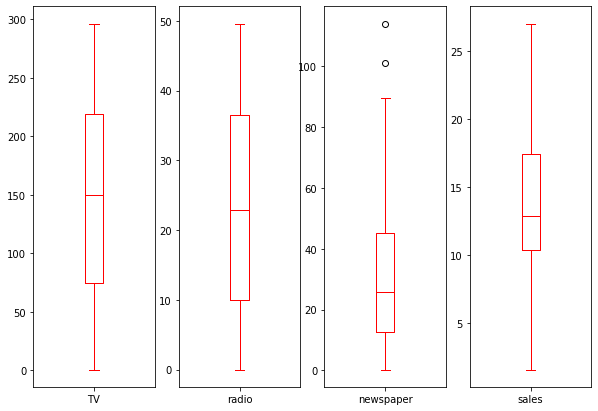

In [9]:
Sales_data.plot(kind='box',subplots=True,figsize=(10,7),color='r')
plt.show()

In [10]:
threshold=3
z=zscore(Sales_data)

In [11]:
np.where(z>threshold)

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))

In [12]:
Sales_data.drop([ 16, 101],inplace=True)

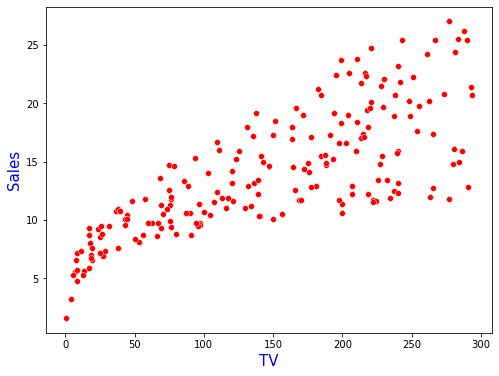

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(Sales_data['TV'],Sales_data['sales'],color='r')
plt.xlabel('TV',size=15,color='b')
plt.ylabel('Sales',size=15,color='b')
plt.show()

As the money on advertising through TV increases the sales increases 

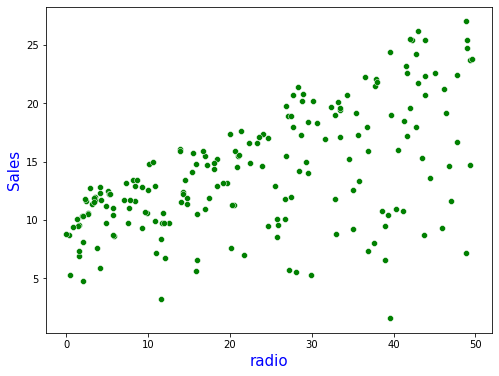

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(Sales_data['radio'],Sales_data['sales'],color='g')
plt.xlabel('radio',size=15,color='b')
plt.ylabel('Sales',size=15,color='b')
plt.show()

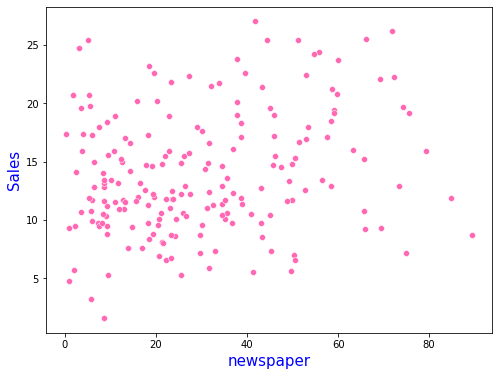

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(Sales_data['newspaper'],Sales_data['sales'],color='hotpink')
plt.xlabel('newspaper',size=15,color='b')
plt.ylabel('Sales',size=15,color='b')
plt.show()

In [16]:
Sales_data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.051978,0.049771,0.779121
radio,0.051978,1.000000,0.346364,0.576748
newspaper,0.049771,0.346364,1.000000,0.219555
sales,0.779121,0.576748,0.219555,1.000000


<AxesSubplot:>

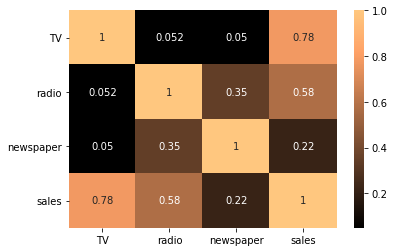

In [17]:
sns.heatmap(Sales_data.corr(),annot=True,cmap='copper')

Sales has high correlation with TV

# Spliting the data into features and vectors

In [18]:
x=Sales_data.drop('sales',axis=1)
y=Sales_data['sales']

In [19]:
for i in range(1000):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.22,random_state=i)
    lr=LinearRegression()
    lr.fit(xtrain,ytrain)
    pred=lr.predict(xtest)
    print(r2_score(ytest,pred),' at ',i)

0.9167610587120777  at  0
0.8996461124948901  at  1
0.8449703847225686  at  2
0.914375658190391  at  3
0.8631646755344204  at  4
0.8499324313205718  at  5
0.8866081060604001  at  6
0.9104394503482458  at  7
0.8646367029958555  at  8
0.9144631720084019  at  9
0.7810659773064857  at  10
0.9266929708229104  at  11
0.9035563107672167  at  12
0.8459869262859756  at  13
0.9151770551429995  at  14
0.9070976125856081  at  15
0.9109980535347281  at  16
0.9096733367949263  at  17
0.8481273980320974  at  18
0.8764093016316303  at  19
0.9125313857443864  at  20
0.9303403440084322  at  21
0.9189022346194544  at  22
0.9258118486666743  at  23
0.9266195325582787  at  24
0.9311043419498887  at  25
0.8133512254828834  at  26
0.8420524727006581  at  27
0.8307185208220993  at  28
0.8561132886804942  at  29
0.8448832398226502  at  30
0.9301106073483696  at  31
0.924687558751921  at  32
0.9076565089493134  at  33
0.8900682149735953  at  34
0.9050904554358494  at  35
0.9155239274050961  at  36
0.90698771924

0.901784129619691  at  309
0.8440927426637082  at  310
0.9139325369714366  at  311
0.8901460107103645  at  312
0.8527093970423302  at  313
0.8950230437826026  at  314
0.9210391603648449  at  315
0.9247164254047681  at  316
0.8762960450450958  at  317
0.8589536988980787  at  318
0.9232631665448238  at  319
0.8612698268606777  at  320
0.8902394592458115  at  321
0.8850221277343756  at  322
0.8760245052553689  at  323
0.8806190136041895  at  324
0.7997333755716369  at  325
0.8862929196748011  at  326
0.8861918143542242  at  327
0.8848945854147823  at  328
0.8538268234353446  at  329
0.9319076074858204  at  330
0.9088081502314876  at  331
0.8918905638493732  at  332
0.9121896472486112  at  333
0.9019316977897806  at  334
0.9224887902986781  at  335
0.9161364946484825  at  336
0.904694877863498  at  337
0.8983859666163334  at  338
0.9217124446575412  at  339
0.9230837517084698  at  340
0.8894997565449465  at  341
0.8514193260191176  at  342
0.9191309228438255  at  343
0.9185745570478918  at

0.8620363117373944  at  608
0.8591530053548394  at  609
0.8226432145005721  at  610
0.8812327016269434  at  611
0.8999579378968969  at  612
0.8942551841022034  at  613
0.891826394649626  at  614
0.7121948806587168  at  615
0.8466755739074506  at  616
0.8686587909330062  at  617
0.8990982554390906  at  618
0.8828270067876423  at  619
0.9131857164474488  at  620
0.9122661275458446  at  621
0.9103626729872499  at  622
0.8752318161123992  at  623
0.8792570877091319  at  624
0.8651244860241796  at  625
0.9122140865155122  at  626
0.918179625814722  at  627
0.7621180749864227  at  628
0.8936610871615953  at  629
0.8772366845341797  at  630
0.9195277588393775  at  631
0.8576381003390098  at  632
0.9117903531088731  at  633
0.8906013183652789  at  634
0.9005584968487002  at  635
0.8785455242615867  at  636
0.8687040142608446  at  637
0.874871740921469  at  638
0.8285385239758412  at  639
0.9144238236013298  at  640
0.8596490587471397  at  641
0.8968162488490476  at  642
0.8066899480457176  at 

0.864259220372839  at  917
0.9145385059041312  at  918
0.7897339429930498  at  919
0.8223313202997745  at  920
0.9082246591538199  at  921
0.9034004034162164  at  922
0.8526457518261434  at  923
0.915052391448061  at  924
0.8718146967977795  at  925
0.8210944380149823  at  926
0.8570671958096725  at  927
0.8834318487041589  at  928
0.8971319552229622  at  929
0.9032162995667082  at  930
0.919125638932678  at  931
0.7901147519401747  at  932
0.8253655820734055  at  933
0.9087377856604788  at  934
0.8307091256743682  at  935
0.9432280834918398  at  936
0.8560973781100955  at  937
0.8362305132789848  at  938
0.8930135922283144  at  939
0.8219586007928675  at  940
0.906792818702414  at  941
0.912405870753137  at  942
0.803344273795716  at  943
0.8754283402173364  at  944
0.8388396008048941  at  945
0.9373124149715403  at  946
0.8831647936156135  at  947
0.8923360374097359  at  948
0.8756604248142472  at  949
0.9149024446911671  at  950
0.8472333162658487  at  951
0.8804732530740429  at  95

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.22,random_state=582)
lr=LinearRegression()
lr.fit(xtrain,ytrain)
pred=lr.predict(xtest)
print(r2_score(pred,ytest)*100,'%')

93.82241249002658 %


**The Model is performing well**

Now,Saving the Model

In [21]:
import pickle 
filename='Advertising.pkl'
pickle.dump(lr,open(filename,'wb'))